In [1]:
import numpy as np
from mp_api.client import MPRester
import re
import pandas as pd
import matplotlib.pyplot as plt

c:\cleen\Apps\Python3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
material_dset = pd.read_csv('possiblealloys_dset_data.csv', header=None)
material_names = material_dset.iloc[:, 0]
material_data = material_dset.iloc[:,1:]
### Find which rows have formation energy for material calculated
material_dset_calculated = material_dset[material_dset[1] != 0]
print(len(material_dset_calculated))
### Store rows where formation energy for material is not calculated
material_dset_unknown = material_dset[material_dset[1] == 0]
print(len(material_dset_unknown))
print(len(material_dset_calculated)+len(material_dset_unknown))


#### Now here's the good stuff we got
calculatedmaterial_names = np.array(material_dset_calculated.iloc[:, 0])
calculatedmaterial_data = np.array(material_dset_calculated.iloc[:,1:])

#           0         ,       1     ,     2       ,   3 - X      ,  X - last
# mainingredient_names, calculation1, calculation2, maincomp_data, all_comp
# mainingredient = ['Superconductor'] 
# calculation1 = ['Formation Energy of supercon']
# calculation2 = ['Weighted formation energy of likely oxides']

105097
20
105117


In [3]:
###### Calculating Formation Energy metric
formationE = calculatedmaterial_data[:,0]
oxideformE = calculatedmaterial_data[:,1]
##Replace oxides with no formE (so not predicted to form an oxide) with small 0.1.
oxideformE = np.where(oxideformE == 0, 0.1, oxideformE)

material_stability = oxideformE - formationE
metric = 1 - material_stability / oxideformE

In [4]:
# metric_dset = np.column_stack((calculatedmaterial_names,metric))
# sorted_metric_indices = np.argsort(metric_dset[:,1])
# sorted_metric_dset = metric_dset[sorted_metric_indices]

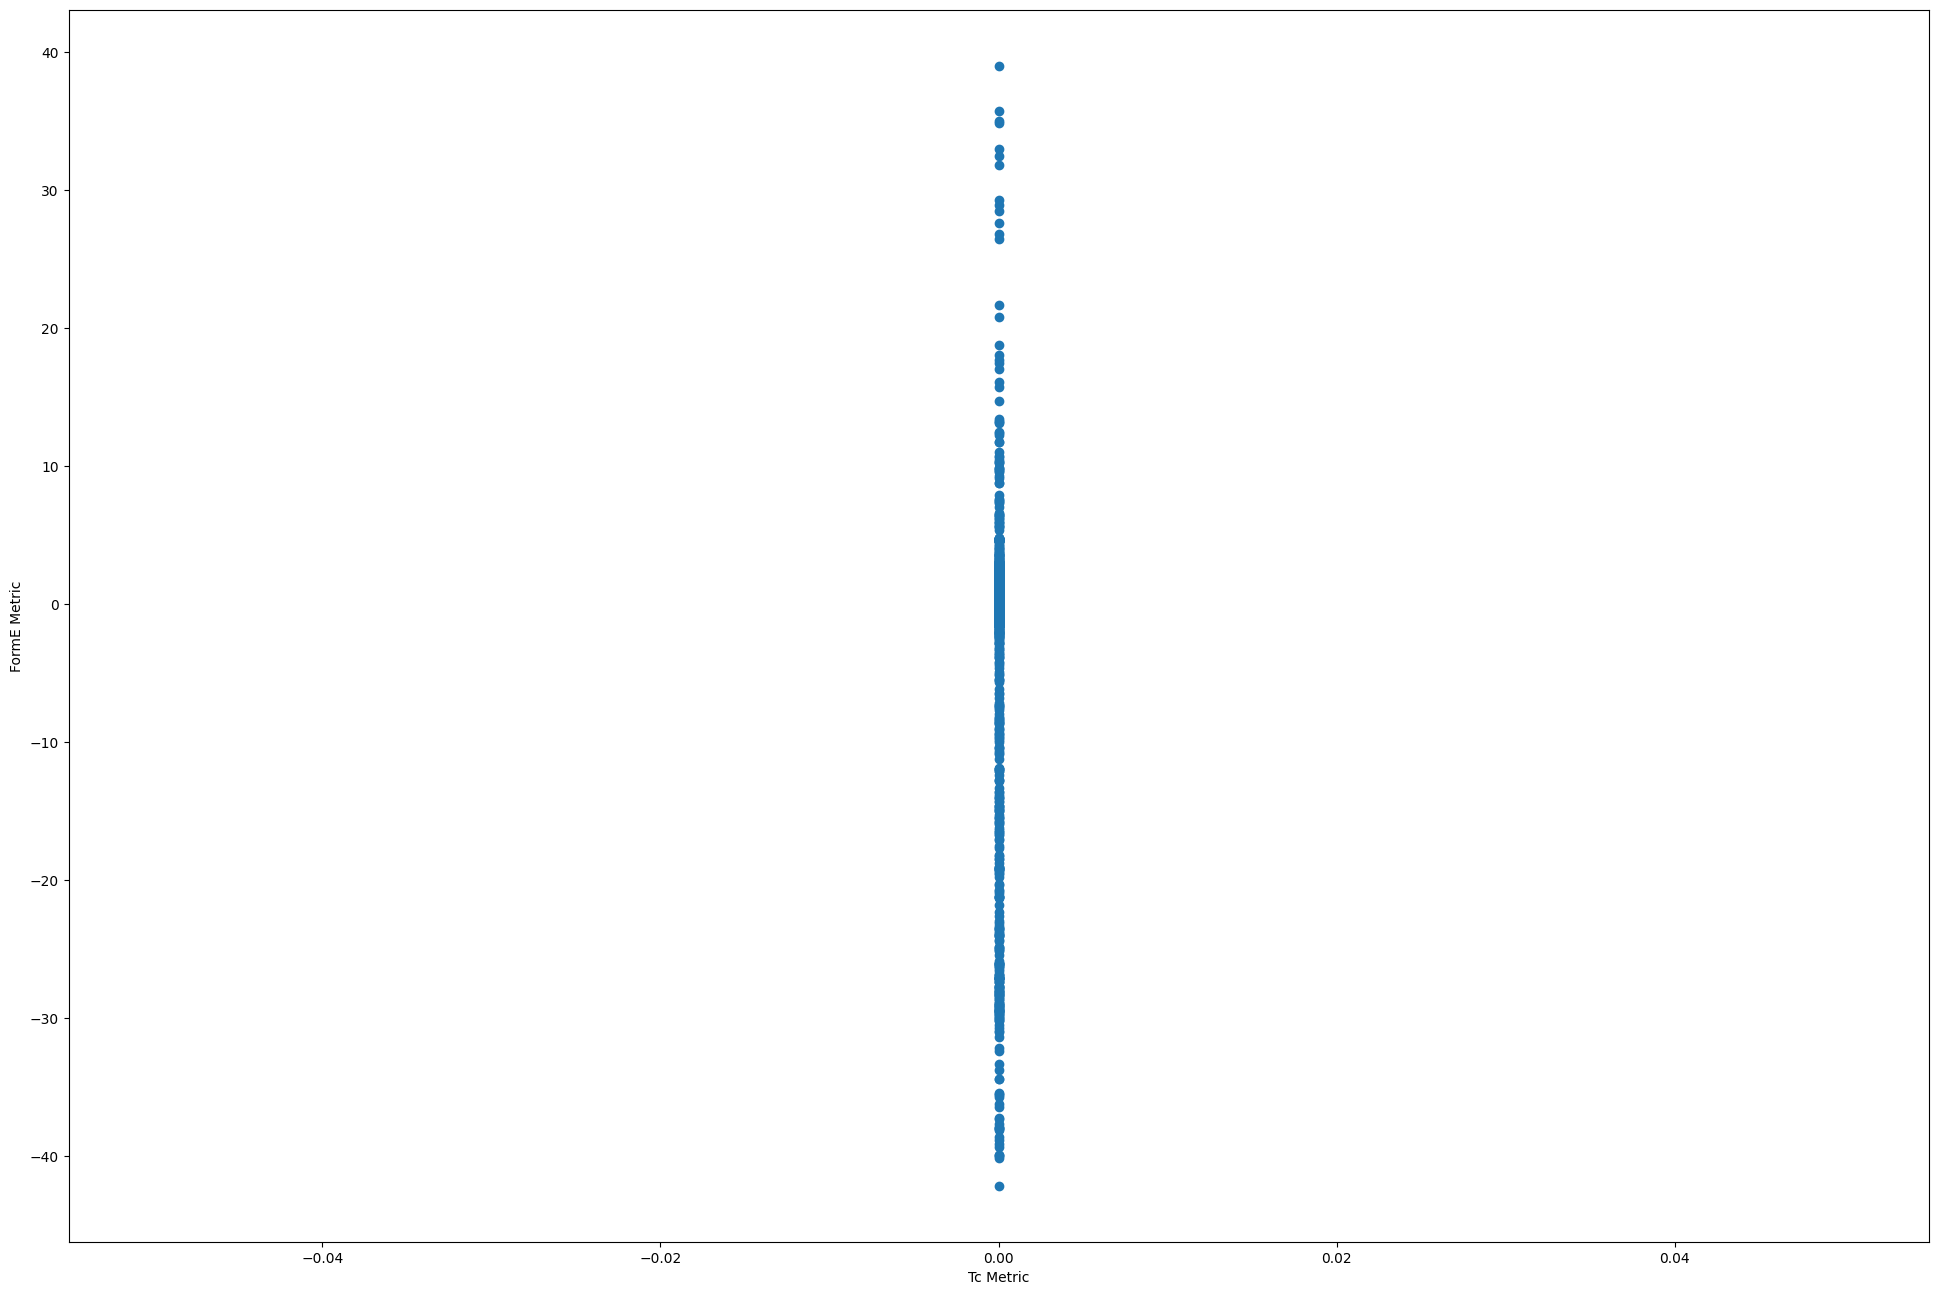

In [7]:
import mplcursors
### Play with Tc and Metric calculations
names_dset = calculatedmaterial_names.tolist()
Tc_dset = calculatedmaterial_data[:,42].tolist()
metric_dset = metric.tolist()


plt.figure(figsize=(24,16))
plt.scatter(Tc_dset, metric_dset)

plt.ylabel('FormE Metric')
plt.xlabel('Tc Metric')
plt.show()

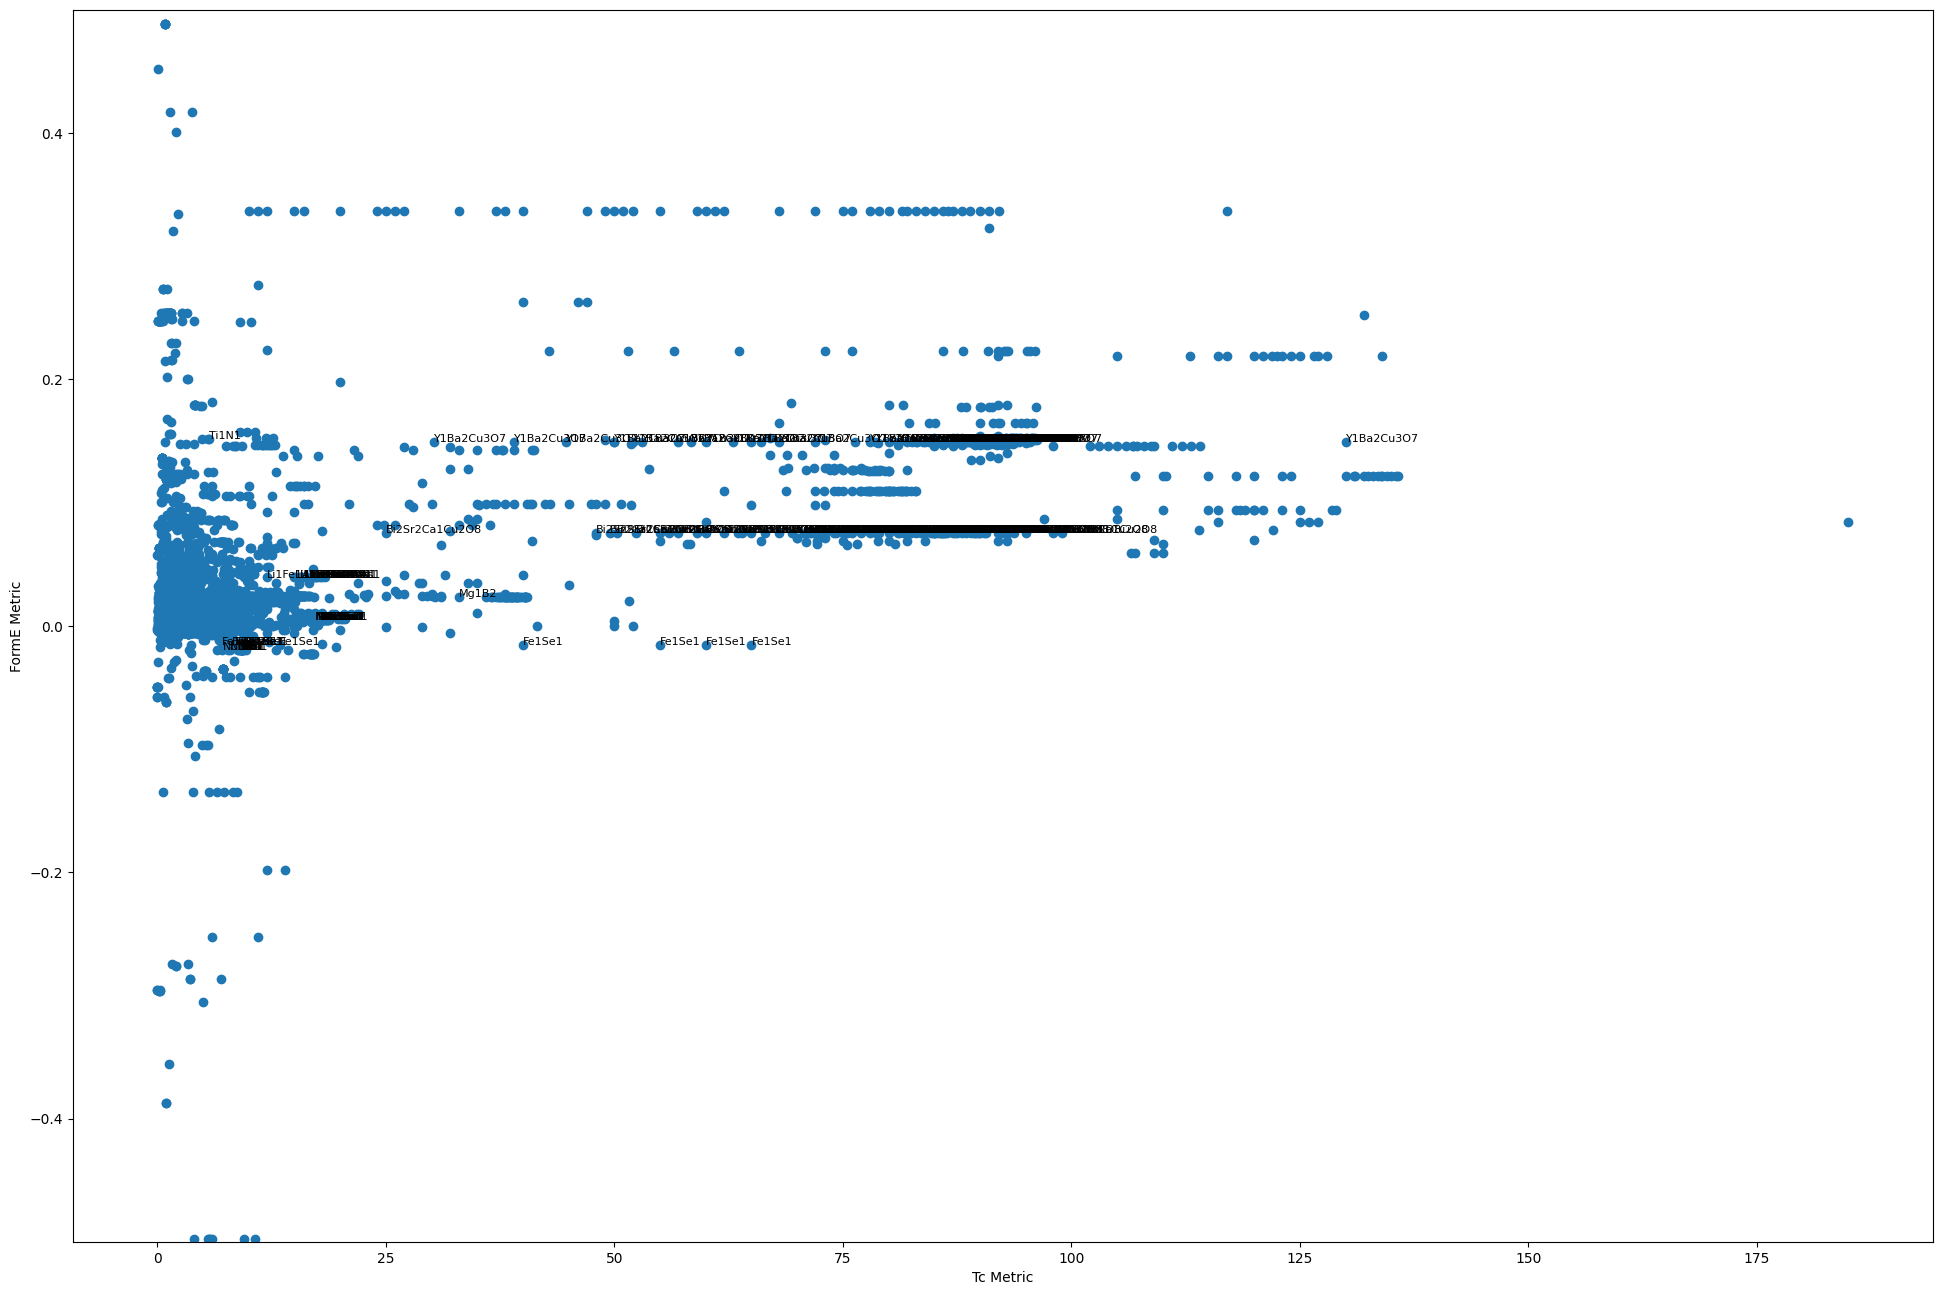

In [16]:
plt.figure(figsize=(24,16))
plt.scatter(Tc_dset, metric_dset)

for i, name in enumerate(names_dset):
    if name =='Ti1N1':
        plt.annotate(name, (Tc_dset[i], metric_dset[i]), fontsize=8)
    if name =='Ta1':
        plt.annotate(name, (Tc_dset[i], metric_dset[i]), fontsize=8)
    if name =='Nb1':
        plt.annotate(name, (Tc_dset[i], metric_dset[i]), fontsize=8)
    if name =='Y1Ba2Cu3O7':
        plt.annotate(name, (Tc_dset[i], metric_dset[i]), fontsize=8)
    if name =='Bi2Sr2Ca1Cu2O8':
        plt.annotate(name, (Tc_dset[i], metric_dset[i]), fontsize=8)
    if name =='Mg1B2':
        plt.annotate(name, (Tc_dset[i], metric_dset[i]), fontsize=8)
    if name =='Nb3Sn1':
        plt.annotate(name, (Tc_dset[i], metric_dset[i]), fontsize=8)
    if name =='Nb1Ti1':
        plt.annotate(name, (Tc_dset[i], metric_dset[i]), fontsize=8)
    if name =='La2Sr1CuO4':
        plt.annotate(name, (Tc_dset[i], metric_dset[i]), fontsize=8)
    if name =='Fe1Se1':
        plt.annotate(name, (Tc_dset[i], metric_dset[i]), fontsize=8)
    if name =='Sn1In1Te3':
        plt.annotate(name, (Tc_dset[i], metric_dset[i]), fontsize=8)
    if name =='Li1Fe1As1':
        plt.annotate(name, (Tc_dset[i], metric_dset[i]), fontsize=8)
plt.ylim(-0.5,0.5)
plt.ylabel('FormE Metric')
plt.xlabel('Tc Metric')
plt.show()